Bin: SmallBin-0
  Dimensions (W×H×D): 30 × 30 × 30
  Max weight: 10
--------------------------------------------------
Bin: SmallBin-1
  Dimensions (W×H×D): 30 × 30 × 30
  Max weight: 10
--------------------------------------------------
Bin: MediumBin-0
  Dimensions (W×H×D): 40 × 40 × 30
  Max weight: 10
--------------------------------------------------
Bin: MediumBin-1
  Dimensions (W×H×D): 40 × 40 × 30
  Max weight: 10
--------------------------------------------------
Bin: MediumBin-2
  Dimensions (W×H×D): 40 × 40 × 30
  Max weight: 10
--------------------------------------------------
Item: Item-0
  Size (WxHxD): 28 × 27 × 13
  Weight: 0
--------------------------------------------------
Item: Item-1
  Size (WxHxD): 19 × 23 × 12
  Weight: 0
--------------------------------------------------
Item: Item-2
  Size (WxHxD): 16 × 22 × 17
  Weight: 0
--------------------------------------------------
Item: Item-3
  Size (WxHxD): 20 × 24 × 18
  Weight: 0
---------------------------------

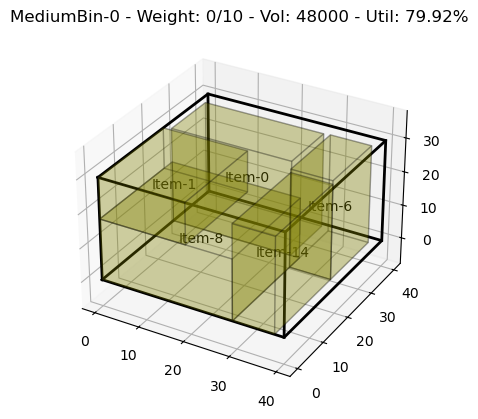

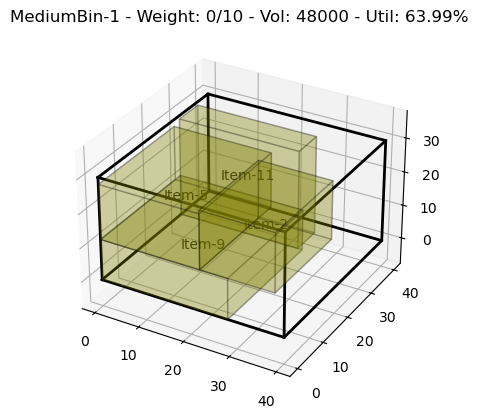

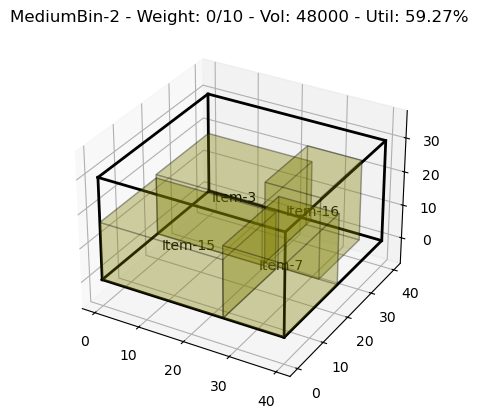

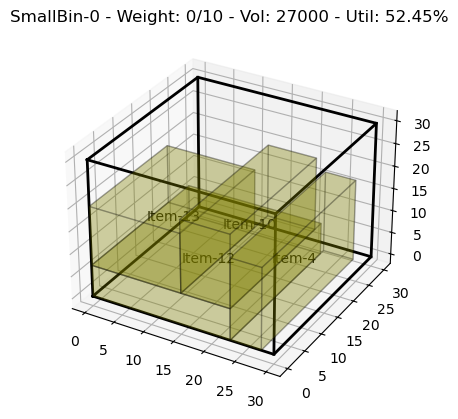

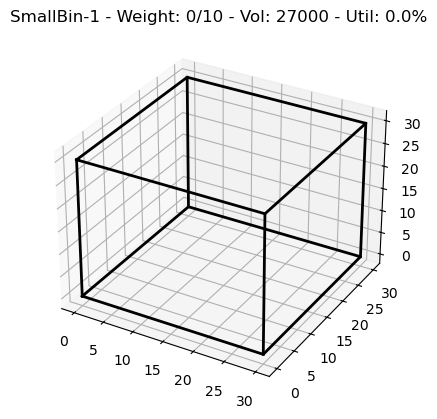

[[28 27 13]
 [19 23 12]
 [16 22 17]
 [20 24 18]
 [18 28  5]
 [22 27 16]
 [16 29  9]
 [21 21 13]
 [29 26 18]
 [28 29 12]
 [16 25  8]
 [29 27  7]
 [23 27  7]
 [15 21 13]
 [28 22  9]
 [27 20 17]
 [17 24 12]]
[[40 40 30]
 [30 30 30]]
[[28 27 13]
 [19 23 12]
 [16 22 17]
 [20 24 18]
 [18 28  5]
 [22 27 16]
 [16 29  9]
 [21 21 13]
 [29 26 18]
 [28 29 12]
 [16 25  8]
 [29 27  7]
 [23 27  7]
 [15 21 13]
 [28 22  9]
 [27 20 17]
 [17 24 12]
 [40 40 30]
 [30 30 30]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 0, 0], [1, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [0, 1, 0], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [1, 0, 0], [0, 0]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import numpy as np
from py3dbp import Packer, Bin, Item, Painter
import time

start = time.time()
# Generator of random bins
def generate_random_bins(num_small, num_medium, num_large):
    bins = []

    def create_bin(size_category, index):
        if size_category=="small":
            dims=[30, 30, 30] #np.random.randint(40,51,size=3)
            weight_limit=3000
        elif size_category=="medium":
            dims=[40, 40, 30] #np.random.randint(51,76,size=3)
            weight_limit=5000
        elif size_category=="large":
            dims=[50, 50, 40] #np.random.randint(76,101,size=3)#[100, 100, 100]
            weight_limit=8000
        else:
            raise ValueError("Invalid size category")

        return Bin(
            partno=f'{size_category.capitalize()}Bin-{index}',
            WHD=tuple(int(d) for d in dims),
            max_weight=10,
            #max_weight=weight_limit,
            corner=0,
            put_type=2  # 1: general, 2: open top
        )

    for i in range(num_small):
        bins.append(create_bin("small", i))
    for i in range(num_medium):
        bins.append(create_bin("medium", i))
    for i in range(num_large):
        bins.append(create_bin("large", i))

    return bins
# Generator of random items
def generate_random_items(num_items):
    items=[]
    for i in range(num_items):
        width = np.random.randint(15,30)
        height = np.random.randint(20,30)
        depth = np.random.randint(5,20)
        size = [width, height, depth]
        size=[int(s) for s in size]
        weight=0 #int(np.random.randint(200,500))
        item=Item(
            partno=f'Item-{i}',
            name=f'item {i}',
            typeof='cube',
            WHD=tuple(size),
            weight=weight,
            level=1, # all items have the same packing priority
            loadbear=100,#*sum(size), # all items have the same laod bearing priority
            updown=True, # all items can be placed upside down
            color='olive')
        items.append(item)
    return items
packer=Packer()

num_small=2 #int(np.random.randint(1,4))
num_medium=3 #int(np.random.randint(1,4))
num_large=0 #int(np.random.randint(1,3)) 
bins=generate_random_bins(num_small, num_medium, num_large)
num_items=int(np.random.randint(10,20))
items=generate_random_items(num_items)
for b in bins:
    print(f"Bin: {b.partno}")
    print(f"  Dimensions (W×H×D): {b.width} × {b.height} × {b.depth}")
    print(f"  Max weight: {b.max_weight}")
    print("--------------------------------------------------")
for item in items:
    print(f"Item: {item.partno}")
    print(f"  Size (WxHxD): {item.width} × {item.height} × {item.depth}")
    print(f"  Weight: {item.weight}")
    print("--------------------------------------------------")
for b in bins:
    packer.addBin(b)
for item in items:
    packer.addItem(item)

packer.pack(
    bigger_first=True, # pack into bigger boxes first
    distribute_items=True,
    fix_point=True,
    check_stable=False,
    support_surface_ratio=0.5,
    number_of_decimals=0
)

packer.putOrder()
# print result
print("***************************************************")
for idx,b in enumerate(packer.bins) :
    print("**", b.string(), "**")
    print("***************************************************")
    print("FITTED ITEMS:")
    print("***************************************************")
    volume = b.width * b.height * b.depth
    volume_t = 0
    volume_f = 0
    unfitted_name = ''
    weight_t=0
    for item in b.items:
        print("partno : ",item.partno)
        print("color : ",item.color)
        print("position : ",item.position)
        print("rotation type : ",item.rotation_type)
        print("W*H*D : ",str(item.width) +' * '+ str(item.height) +' * '+ str(item.depth))
        print("volume : ",float(item.width) * float(item.height) * float(item.depth))
        print("weight : ",float(item.weight))
        volume_t += float(item.width) * float(item.height) * float(item.depth)
        weight_t+=float(item.weight)
        print("***************************************************")
    
    space_utilization = round(volume_t / float(volume) * 100, 2)
    print('space utilization :', space_utilization )
    print('residual volume : ', float(volume) - volume_t )
    print('total weight in bin: ', weight_t)
    print("gravity distribution : ",b.gravity)
    print("***************************************************")
    # draw results
    painter = Painter(b)
    fig = painter.plotBoxAndItems(
    title=f"{b.partno} - Weight: {int(weight_t)}/{int(b.max_weight)} - Vol: {int(volume)} - Util: {space_utilization}%",
        alpha=0.2,
        write_num=True,
        fontsize=10
    )

print("***************************************************")
print("UNFITTED ITEMS:")
for item in packer.unfit_items:
    print("***************************************************")
    print('name : ',item.name)
    print("partno : ",item.partno)
    print("color : ",item.color)
    print("W*H*D : ",str(item.width) +' * '+ str(item.height) +' * '+ str(item.depth))
    print("volume : ",float(item.width) * float(item.height) * float(item.depth))
    print("weight : ",float(item.weight))
    volume_f += float(item.width) * float(item.height) * float(item.depth)
    unfitted_name += '{},'.format(item.partno)
    print("***************************************************")
print("***************************************************")
print('unpack item : ',unfitted_name)
print('unpack item volume : ',volume_f)

stop = time.time()
print('used time : ',stop - start)

fig.show()

# Generation of item nodes Va
Va=np.array([[int(item.width), int(item.height), int(item.depth)] for item in items])
print(Va)

# Generation of bin size nodes Vb
unique_bin_dims = set((int(bin.width), int(bin.height), int(bin.depth)) for bin in bins)
Vb=np.array(sorted(list(unique_bin_dims),reverse=True))
print(Vb)

# Matrix V=(Va;Vb)
V=np.vstack([Va,Vb])
print(V)

# Generation of edge set E
n=Va.shape[0]+Vb.shape[0]
E=[[0 for _ in range(n)] for _ in range(n)]

# Length of one-hot vector for each bin size
b_small=num_small
b_medium=num_medium
b_large=num_large
b_sizes={
    'small': b_small,
    'medium': b_medium,
    'large': b_large}

# Create map of bin size categories and index of each bin in that category
bin_size_map={'small': [], 'medium': [], 'large':[]}

for i,b in enumerate(bins):
    if b.width+b.height+b.depth<=90:
        bin_size_map['small'].append(i)
    elif b.width+b.height+b.depth>90 and b.width+b.height+b.depth<=110:
        bin_size_map['medium'].append(i)
    elif b.width+b.height+b.depth>110:
        bin_size_map['large'].append(i)

bin_size_to_vb_index={tuple(dim): i for i,dim in enumerate(Vb)}

# Fill E
for bin_category, bin_indices in bin_size_map.items():
    one_hot_length=b_sizes[bin_category]

    for bin_global_index in bin_indices:
        b=bins[bin_global_index]
        bin_dims=(int(b.width), int(b.height), int(b.depth))
        vb_index=bin_size_to_vb_index[bin_dims]
        bin_index=num_items+vb_index

        for item_index in range(num_items):
            E[item_index][bin_index]=[0]*one_hot_length
            E[bin_index][item_index]=[0]*one_hot_length

    for local_idx, bin_global_index in enumerate(bin_indices):
        b=bins[bin_global_index]
        bin_dims=(int(b.width),int(b.height),int(b.depth))
        vb_index=bin_size_to_vb_index[bin_dims]
        bin_index=num_items+vb_index

        for item in b.items:
            item_index=int(item.partno.split('-')[1])
            E[item_index][bin_index][local_idx]=1
            E[bin_index][item_index][local_idx]=1
            
for i,row in enumerate(E):
    print(row)
